## Importing Package 

In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Interpretating Functions

<b><font size="5">Softmax Function</font>

In [102]:
def logistic_regression_mode(X, Y):
    x1 = X
    Y1 = Y
    X_train, X_test, y_train, y_test = train_test_split(
        x1, Y1, test_size=0.2, random_state=2)
    print(y_train)
    model = LogisticRegression(multi_class='multinomial', max_iter=50)
    model.fit(X_train, y_train)
    Y_Pred = model.predict(X_test)
    f1scores = f1_score(y_test, Y_Pred, average='weighted')
    accuracyscore = accuracy_score(y_test, Y_Pred)
    statistic = [f1scores, accuracyscore]
    return statistic

<b><font size="5">Gaussian NB</font>

In [104]:
def gaussian_NB_mode(X, Y):
    x1 = X
    Y1 = Y
    X_train, X_test, y_train, y_test = train_test_split(
        x1, Y1, test_size=0.2, random_state=2)
    print(y_train)
    model = GaussianNB()
    model.fit(X_train, y_train)
    Y_Pred = model.predict(X_test)
    f1scores = f1_score(y_test, Y_Pred, average='weighted')
    accuracyscore = accuracy_score(y_test, Y_Pred)
    statistic = [f1scores, accuracyscore]
    return statistic

<b><I><font size="5">Support Vector Machine</font>

In [106]:
def support_vector_machine_model(X, Y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, Y, test_size=0.2, random_state=2)

    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)

    Y_pred = model.predict(X_test)

    f1_score_value = f1_score(y_test, Y_pred, average='weighted')
    accuracy_score_value = accuracy_score(y_test, Y_pred)

    return f1_score_value, accuracy_score_value

In [120]:
def data_frames(logistic_regression_result, gaussian_NB_result):
    results_df = pd.DataFrame({
        'Model': ['Logistic Regression', 'Gaussian Naive Bayes'],
        'F1 Score': [logistic_regression_result[0], gaussian_NB_result[0]],
        'Accuracy Score': [logistic_regression_result[1], gaussian_NB_result[1]]
    })

    # Display the results DataFrame
    print(results_df)

## Checking Data lost Function

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, TruncatedSVD


def dimension_reduction(data, target, component):
    # Linear Discriminant Analysis (LDA)
    lda = LinearDiscriminantAnalysis(n_components=component)
    X_lda = lda.fit_transform(data, target)
    explained_variance_ratio_lda = lda.explained_variance_ratio_
    data_retained_lda = np.sum(explained_variance_ratio_lda)

    # Principal Component Analysis (PCA)
    pca = PCA(n_components=component)
    pca_result = pca.fit_transform(data)
    explained_variance_ratio_pca = pca.explained_variance_ratio_
    data_loss_pca = 1 - explained_variance_ratio_pca[0]

    # Truncated Singular Value Decomposition (TruncatedSVD)
    svd = TruncatedSVD(n_components=component)
    transformed_data_svd = svd.fit_transform(data)
    explained_variance_ratio_svd = svd.explained_variance_ratio_
    data_lost_svd = 1 - explained_variance_ratio_svd[0]

    # Create a DataFrame
    results_df = pd.DataFrame({
        'Method': ['LDA', 'PCA', 'TruncatedSVD'],
        'Explained Variance Ratio': [explained_variance_ratio_lda[0], explained_variance_ratio_pca[0], explained_variance_ratio_svd[0]],
        'Data Retained(%)': [data_retained_lda * 100, (1 - data_loss_pca) * 100, (1 - data_lost_svd) * 100],
        'Data Lost(%)': [(1 - explained_variance_ratio_lda[0]) * 100, data_loss_pca * 100, data_lost_svd * 100]
    })

    return results_df

## Dimension Reduction Function

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, TruncatedSVD


def reduced_dimension(data, target, component, number):
    if number == 1:
        # Linear Discriminant Analysis (LDA)
        lda = LinearDiscriminantAnalysis(n_components=component)
        X_lda = lda.fit_transform(data, target)
        return X_lda
    elif number == 2:
        # Principal Component Analysis (PCA)
        pca = PCA(n_components=component)
        pca_result = pca.fit_transform(data)
        return pca_result
    else:
        # Truncated Singular Value Decomposition (TruncatedSVD)
        svd = TruncatedSVD(n_components=component)
        transformed_data_svd = svd.fit_transform(data)
        return transformed_data_svd

## Data Reading

In [56]:
data = pd.read_csv("smoking_driking.csv")
data.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [57]:
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])  # 1 for Male 0 for Female
data['DRK_YN'] = encoder.fit_transform(data['DRK_YN'])  # 1 for yes 0 for No
data

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


<I><font size="6">Splitting of Data</font>

In [58]:
X1 = np.array(data["sex"])
X2 = np.array(data["age"])
X3 = np.array(data["height"])
X4 = np.array(data["weight"])
X5 = np.array(data["waistline"])  # (measurement of person's waist)
X6 = np.array(data["sight_left"])
X7 = np.array(data["sight_right"])
X8 = np.array(data["hear_left"])
X9 = np.array(data["hear_right"])
Drinking = np.array(data['DRK_YN'])
Smoking = np.array(data['SMK_stat_type_cd'])

## Analyzing data for Smoking

<I><font size="5">Visualizing Distribution of data by plot</font>

In [59]:
def plotting(num):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    for idx, column in enumerate(['sex', 'age', 'waistline', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'], start=1):
        sbp_data = data[column][0:100000]

        # Calculate the position in the 3x3 grid
        row = (idx - 1) // 3
        col = (idx - 1) % 3

        # Set the current subplot
        plt.subplot(3, 3, idx)

        if num == 2:
            sns.boxplot(x=Smoking[0:100000], y=sbp_data, ax=axes[row, col])
            plt.xlabel('Smoking Status')
            plt.ylabel(column)
            plt.title(f'{column} vs Smoking Status')
        else:
            sns.boxplot(x=Drinking[0:100000], y=sbp_data, ax=axes[row, col])
            plt.xlabel('Drinking Status')
            plt.ylabel(column)
            plt.title(f'{column} vs Drinking Status')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

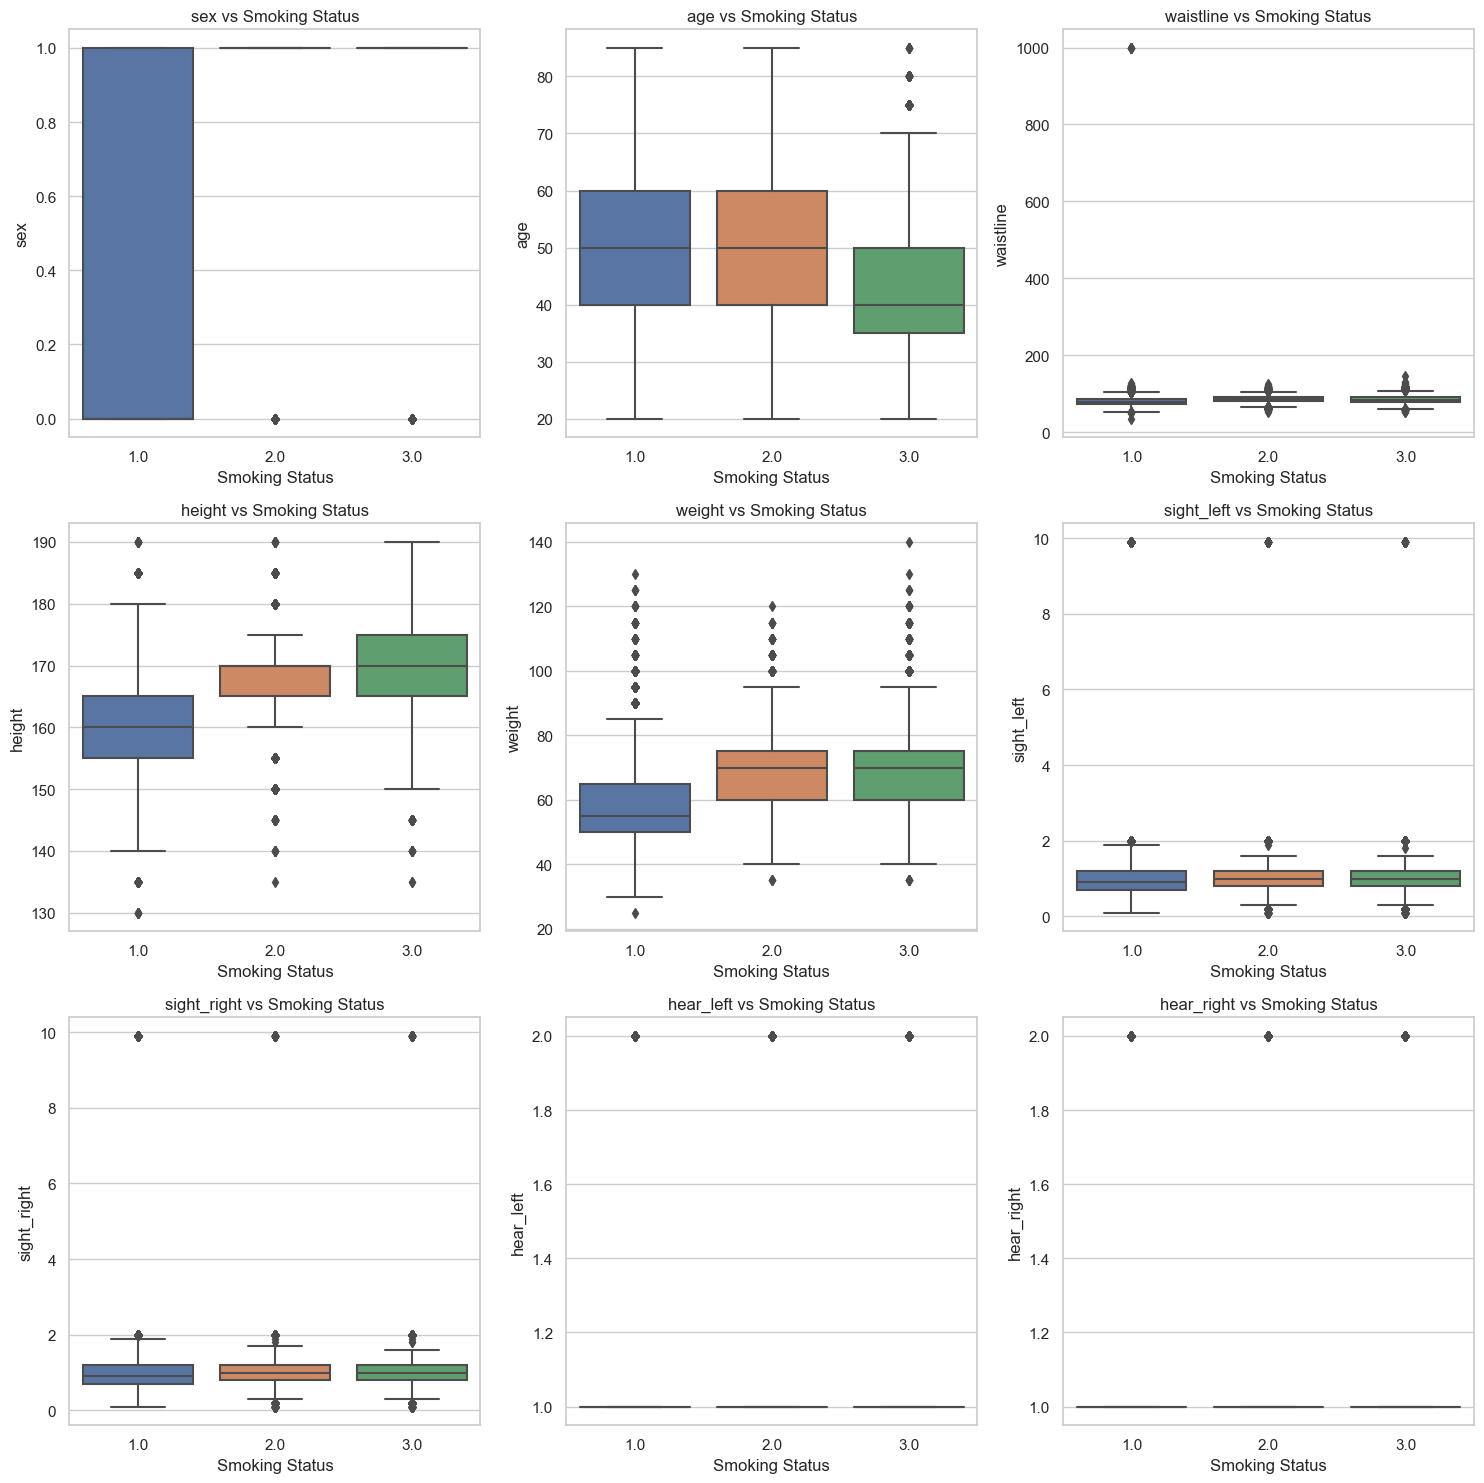

In [60]:
plotting(2)

<I><font size="5">Mean and Standarad Deviation from data</font>

In [61]:
results_df = pd.DataFrame(
    columns=['Column', 'Group', 'Mean', 'Standard Deviation'])

for idx, column in enumerate(['sex', 'age', 'waistline', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'], start=1):
    rawdata = np.array(data[column])

    smoking_1 = rawdata[Smoking == 1]
    smoking_2 = rawdata[Smoking == 2]
    smoking_3 = rawdata[Smoking == 3]

    # Append results to the DataFrame
    results_df = pd.concat([
        results_df,
        pd.DataFrame({'Column': [column]*3, 'Group': [1, 2, 3], 'Mean': [np.mean(smoking_1), np.mean(smoking_2),
                     np.mean(smoking_3)], 'Standard Deviation': [np.std(smoking_1), np.std(smoking_2), np.std(smoking_3)]})
    ], ignore_index=True)

# Print the final DataFrame
print(results_df)

         Column Group        Mean  Standard Deviation
0           sex     1    0.273356            0.445682
1           sex     2    0.937565            0.241943
2           sex     3    0.924058            0.264905
3           age     1   48.455401           14.830656
4           age     2   50.112632           12.996897
5           age     3   43.203960           12.159039
6     waistline     1   79.001125           12.957322
7     waistline     2   85.312877            8.473225
8     waistline     3   84.182930            9.104226
9        height     1  158.572582            8.686537
10       height     2  167.382296            6.867660
11       height     3  168.364555            7.158437
12       weight     1   59.306272           11.348147
13       weight     2   69.406891           10.922239
14       weight     3   69.477808           12.324558
15   sight_left     1    0.949829            0.613180
16   sight_left     2    1.013957            0.621486
17   sight_left     3    1.0

<b><font size="5">Frequency Distribution</font>

1
2
3
4
5
6
7
8
9


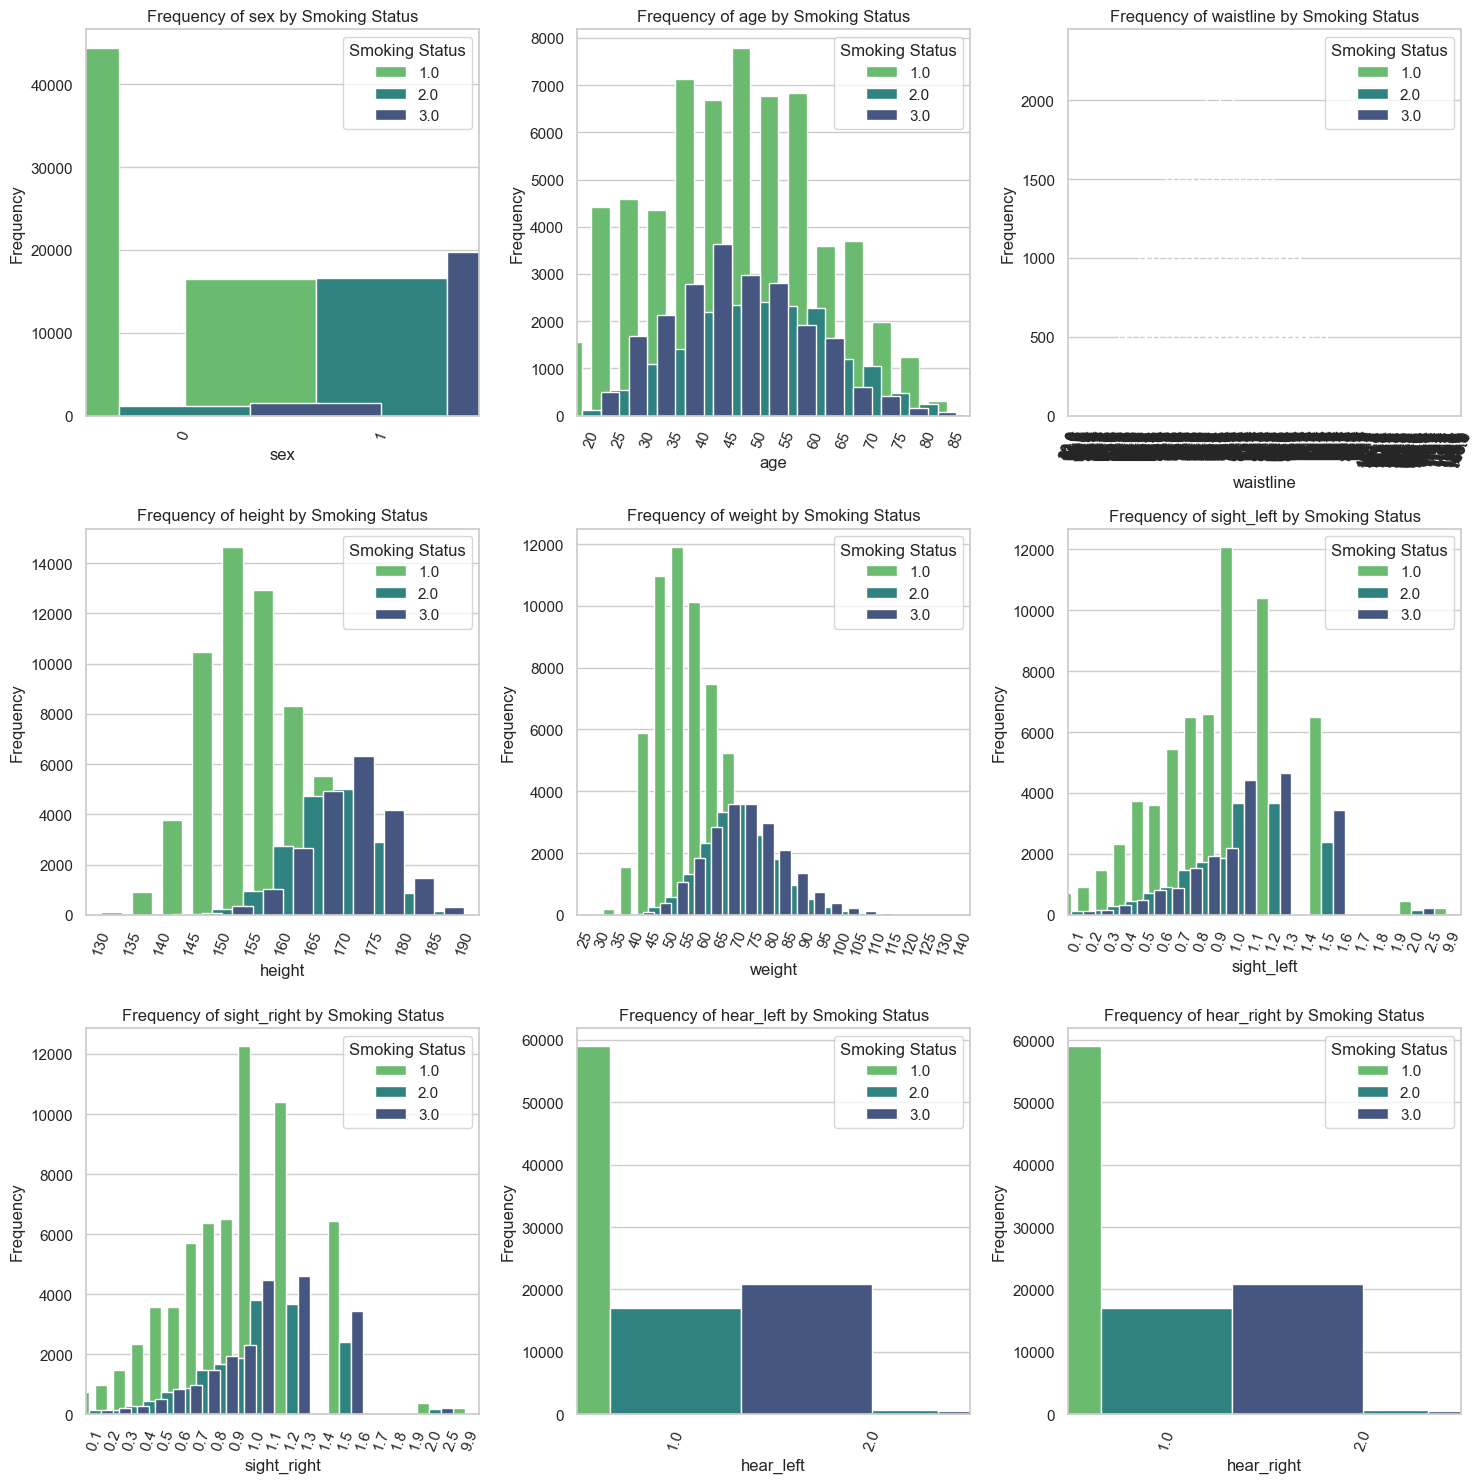

In [62]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['sex', 'age', 'waistline', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'], start=1):
    plt.subplot(3, 3, idx)  # Adjust the subplot layout to 3 by 3

    sns.countplot(x=column, hue="SMK_stat_type_cd", palette='viridis_r',
                  data=random_sample_data, width=2)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(idx)

plt.tight_layout()
plt.show()

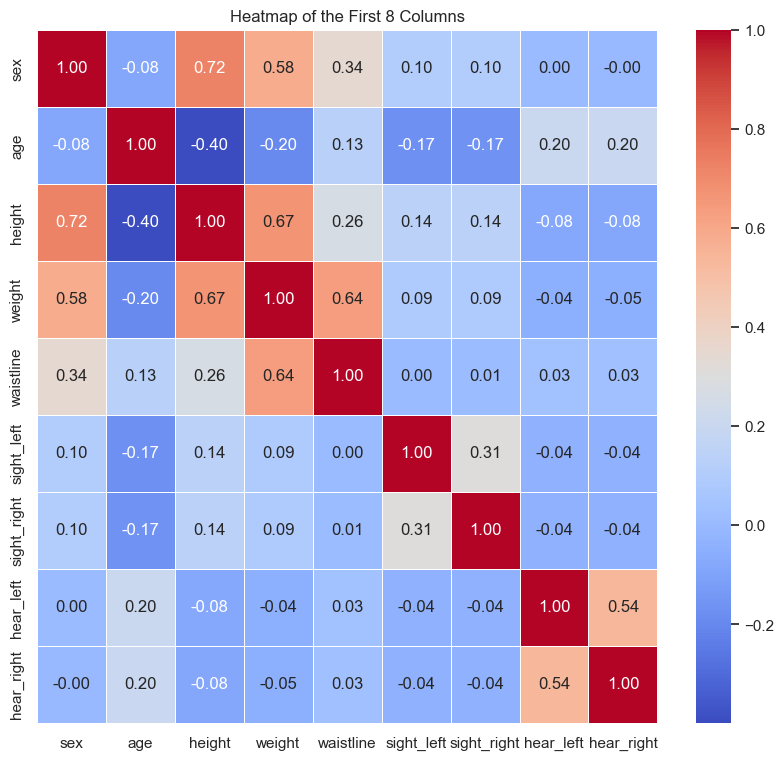

In [63]:
# Select the first 8 columns
subset_data = data.iloc[:, :9]

# Create a heatmap
plt.figure(figsize=(10, 9))
heatmap = sns.heatmap(subset_data.corr(), annot=True,
                      cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of the First 8 Columns')
plt.show()

In [ ]:
X = np.array([X1, X2, X3, X4, X5, X6, X7, X8, X9])
X = X.T
f1_score_result, accuracy_score_result = support_vector_machine_model(
    X, Smoking)
print("F1 Score:", f1_score_result)
print("Accuracy Score:", accuracy_score_result)

In [124]:
import warnings
from sklearn.exceptions import ConvergenceWarning
X = np.array([X1, X2, X3, X4, X5, X6, X7, X8, X9])
X = X.T
warnings.filterwarnings("ignore", category=ConvergenceWarning)
logistic_regression_result = logistic_regression_mode(X, Smoking)
gaussian_NB_result = gaussian_NB_mode(X, Smoking)
data_frames(logistic_regression_result, gaussian_NB_result)

[3. 1. 1. ... 1. 3. 1.]
[3. 1. 1. ... 1. 3. 1.]
                  Model  F1 Score  Accuracy Score
0   Logistic Regression  0.552450        0.616644
1  Gaussian Naive Bayes  0.665471        0.662052


<b><I><font size="5">Checking Data lost while reducing dimension</font>

In [66]:
reduction = data[['sex', 'height']]
results_df = dimension_reduction(reduction, Smoking, 1)
print(results_df)

         Method  Explained Variance Ratio  Data Retained(%)  Data Lost(%)
0           LDA                  0.995427         99.542713      0.457287
1           PCA                  0.998626         99.862581      0.137419
2  TruncatedSVD                  0.997370         99.736954      0.263046


In [67]:
reduction = data[['sex', 'height', 'weight']]
results_df = dimension_reduction(reduction, Smoking, 2)
print(results_df)

         Method  Explained Variance Ratio  Data Retained(%)  Data Lost(%)
0           LDA                  0.994941        100.000000      0.505869
1           PCA                  0.850968         85.096842     14.903158
2  TruncatedSVD                  0.611211         61.121133     38.878867


In [123]:
reduction = data[['sex', 'height', 'weight']]
XA = reduced_dimension(reduction, Smoking, 2, 1)
XA = XA
XA = np.array(XA)
XA1 = XA[:, 0]
XA2 = XA[:, 1]

In [122]:
X = np.array([XA1, XA2, X2, X5, X6, X7, X8, X9])
X = X.T
logistic_regression_result = logistic_regression_mode(X, Smoking)
gaussian_NB_result = gaussian_NB_mode(X, Smoking)
data_frames(logistic_regression_result, gaussian_NB_result)

[3. 1. 1. ... 1. 3. 1.]
[3. 1. 1. ... 1. 3. 1.]
                  Model  F1 Score  Accuracy Score
0   Logistic Regression  0.670084        0.659631
1  Gaussian Naive Bayes  0.669927        0.661164


In [114]:
reduction = data[['hear_left', 'hear_right']]
results_df = dimension_reduction(reduction, Smoking, 1)
print(results_df)

         Method  Explained Variance Ratio  Data Retained(%)  Data Lost(%)
0           LDA                  0.992084         99.208430      0.791570
1           PCA                  0.768529         76.852884     23.147116
2  TruncatedSVD                  0.768422         76.842191     23.157809


In [116]:
reduction = data[['hear_left', 'hear_right']]
XB = reduced_dimension(reduction, Smoking, 1, 1)
XB = XB
XB = np.array(XB)
XB1 = XA[:, 0]
XB1

array([ 1.25293174,  1.37191503,  1.19930667, ..., -1.40209873,
        1.27135737,  1.13394845])

In [121]:
X = np.array([XA1, XA2, X2, X5, X6, X7, XB1])
X = X.T
logistic_regression_result = logistic_regression_mode(X, Smoking)
gaussian_NB_result = gaussian_NB_mode(X, Smoking)
data_frames(logistic_regression_result, gaussian_NB_result)

[3. 1. 1. ... 1. 3. 1.]
[3. 1. 1. ... 1. 3. 1.]
                  Model  F1 Score  Accuracy Score
0   Logistic Regression  0.675637        0.660927
1  Gaussian Naive Bayes  0.690665        0.668694
